# 使用梯度上市实现PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X=np.empty((100,2))
X[:,0]=np.random.uniform(0.,100.,size=100)
X[:,1]=0.75*X[:,0]+3.+np.random.normal(0.,10.,size=100)

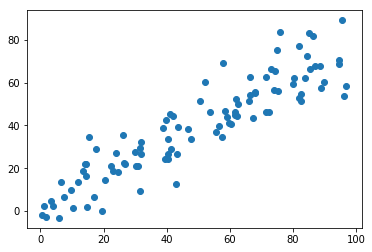

In [8]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### demean

In [9]:
def demean(X):
    return X - np.mean(X,axis=0)

In [10]:
X_demean=demean(X)

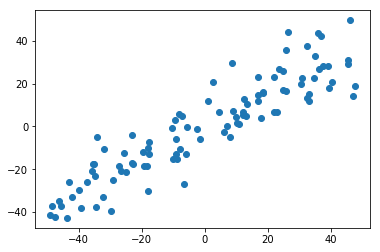

In [11]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [13]:
np.mean(X_demean[:,0])

2.1671553440683055e-15

In [15]:
np.mean(X_demean[:,1])

4.298783551348606e-15

### 梯度上升法

In [29]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

def df_debug(w,X,epsilon=0.0001):
    res=np.empty(len(w))
    for i in range(len(w)):
        w_1=w.copy()
        w_1[i]+=epsilon
        w_2=w.copy()
        w_2[i]-=epsilon
        res[i] = (f(w_1,X)-f(w_2,X))/(2*epsilon)
    return res

def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    
    w= direction(initial_w)
    cur_iter=0
    
    while cur_iter<n_iters:
        gradient=df(w,X)
        last_w=w
        w=w+eta*gradient
        w=direction(w)  # 每次只求一个单位向量
        if abs(f(w,X)-f(last_w,X))<epsilon:
            break
        cur_iter+=1
    return w

In [22]:
initial_w=np.random.random(X.shape[1])  #初始化不能从零开始
initial_w

array([0.11284527, 0.16240345])

In [23]:
eta =0.001   #不能使用StandardScaler标准化数据

In [30]:
gradient_ascent(df_debug,X_demean,initial_w,eta)

array([0.78163172, 0.62374022])

In [31]:
gradient_ascent(df_math,X_demean,initial_w,eta)

array([0.78163172, 0.62374022])

In [32]:
w= gradient_ascent(df_math,X_demean,initial_w,eta)

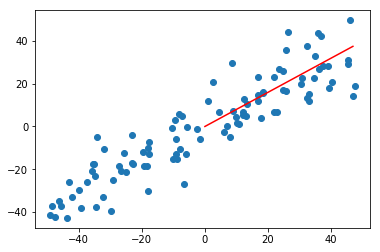

In [37]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*60],[0,w[1]*60],color='r')
plt.show()

### 使用极端数据集测试

In [39]:
X2=np.empty((100,2))
X2[:,0]= np.random.uniform(0.,100.,size=100)
X2[:,1]=0.75*X2[:,0] +3.

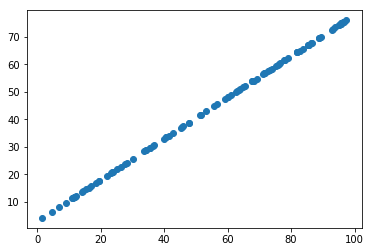

In [40]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [41]:
X2_demean=demean(X2)

In [42]:
w2= gradient_ascent(df_math,X2_demean,initial_w,eta)

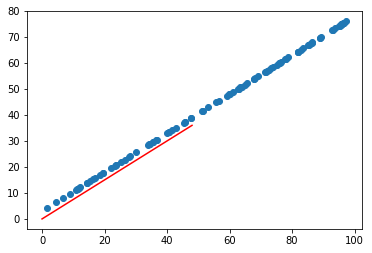

In [43]:
plt.scatter(X2[:,0],X2[:,1])
plt.plot([0,w2[0]*60],[0,w2[1]*60],color='r')